<a href="https://colab.research.google.com/github/RodolfoFerro/modulo-deep-learning/blob/main/notebooks/03_Introducci%C3%B3n_al_aprendizaje_profundo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aprendizaje profundo - Sesión 3  🧠**

> **Descripción:** Cuaderno de contenidos del módulo de aprendizaje profundo para el Dimplomado en Ciencia de Datos de la ENES UNAM León, 2024. <br>
> **Autor:** [Rodolfo Ferro](https://github.com/RodolfoFerro) <br>
> **Contacto:** [ferro@cimat.mx](mailto:ferro@cimat.mx)


## Contenido

### Sección I

1. Overfitting vs. Underfitting
2. Regularización:
    - Dropout
    - Early Stopping

### Sección II

3. Problemas de regresión

### Sección III

4. Problemas de clasificación

## **Sección I**

### **IMPORTANTE**

El contenido de esta sección ha sido descrito en su totalidad a través de la presentación.

Conviene revisar el material que puedes encontrar en el [repositorio](https://github.com/RodolfoFerro/modulo-deep-learning).

### **Ejemplo de Early Stopping**

In [ ]:
import tensorflow as tf
import numpy as np


# Sample data (XOR)
x = np.array([(0, 0), (1, 0), (0, 1), (1, 1)])
y = np.array([0, 1, 1, 0])


# Creates the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(2, activation='linear'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


# Compile the model
loss = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.6)

model.compile(optimizer=optimizer, loss=loss, metrics=[loss])

In [ ]:
# Create a callback
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [ ]:
history = model.fit(x, y, epochs=1000, callbacks=[callback])

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.2991 - mean_squared_error: 0.2991
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step - loss: 0.2859 - mean_squared_error: 0.2859
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.2762 - mean_squared_error: 0.2762
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2695 - mean_squared_error: 0.2695
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.2648 - mean_squared_error: 0.2648
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.2616 - mean_squared_error: 0.2616
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.2594 - mean_squared_error: 0.2594
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2579 - mean_squared_error: 0.2579
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2568 - mean_squared_error: 0.2568
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2560 - mean_squared_error: 0.2560
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/ste

In [ ]:
import plotly.express as px


losses = history.history['loss']
eje_x = np.arange(len(losses))

fig = px.line(
    x=eje_x,
    y=losses,
    title='Historia de entrenamiento',
    labels=dict(x='Épocas', y='Error')
)
fig.show()

## **Sección II**

### **Regresión lineal 01**

Resolveremos este primer ejercicio creando una red neuronal sencilla con datos sintéticos.

In [ ]:
import numpy as np

x = np.linspace(0, 100, 101)
x

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100.])

In [ ]:
y = x + 10 * np.random.random((len(x)))
y

array([  7.29262486,   1.61216638,   8.12380527,   9.3083829 ,
        12.52745934,   8.75419938,   6.81885501,   7.89040836,
        16.09585932,  16.786697  ,  12.59452979,  17.48345632,
        19.91020386,  15.1764385 ,  19.5608326 ,  22.95550117,
        18.12425607,  21.02226392,  23.55051097,  28.42538171,
        20.27622274,  23.81406594,  28.25782865,  27.6272265 ,
        30.02153034,  30.11305668,  34.20423274,  35.8801523 ,
        28.33065062,  32.38676609,  33.26593987,  35.09653645,
        33.67697331,  41.52706083,  35.95926911,  40.27547565,
        44.11665724,  44.42654757,  43.05673935,  46.30610385,
        44.85442105,  44.92516404,  45.48651648,  49.27706138,
        49.29875078,  49.68203653,  54.24991433,  51.09715062,
        56.15454589,  53.24448563,  54.48167391,  51.53178504,
        52.47541125,  55.76442244,  60.23611653,  59.37028741,
        62.09439235,  57.06560607,  64.49660053,  68.17136589,
        67.9419674 ,  70.07346331,  62.04537327,  64.63

In [ ]:
import plotly.express as px


fig = px.scatter(x=x, y=y)
fig.show()

### **Modelo**

Por la simplicidad de los datos, podemos intentar realizar el ajuste de una recta, por lo que una simple neurona artificial bastará para modelar la ecuación $y=mx+b$.

El peso entrenado corresponderá a la pendiente $m$ de la ecuación y el _bias_ al valor de intersección $b$.

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[1]))  # Capa de entrada
model.add(tf.keras.layers.Dense(1, activation='linear'))  # Capa de salida

### **Optimizador y función de pérdida**

$$ \mathrm{MSE}=\frac{1}{N}\cdot\sum_{i=1}^N \left(y_i- \hat{y}_i \right )^2 $$

In [ ]:
# TODO: Create loss function and optimizer
loss = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-1) # Try SGD(learning_rate=1e-5) / Adam(learning_rate=1e-1)

> **¿Qué es ADAM?** $\rightarrow$ https://www.geeksforgeeks.org/adam-optimizer/

In [ ]:
# TODO: Add optimizer and loss to model compilation
model.compile(loss=loss, optimizer=optimizer, metrics=[loss])

In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

### **Entrenamiento del modelo**

In [ ]:
history = model.fit(x, y, epochs=100)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 1111.2946 - mean_squared_error: 1038.1714
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 109.2356 - mean_squared_error: 103.7125  
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 50.0332 - mean_squared_error: 60.7039 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 159.4017 - mean_squared_error: 151.0386 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 87.3943 - mean_squared_error: 87.0503   
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20.8171 - mean_squared_error: 20.9213 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32.0302 - mean_squared_error: 31.6300 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 46.3377 - mean_squared_error: 45.5062 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30.1642 - mean_squared_error: 28.2664 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.7560 - mean_squared_error: 14.1560 
Epoch 11/100
4/4 ━━━━━━━━━━━

In [ ]:
import plotly.express as px


losses = history.history['loss']
eje_x = np.arange(len(losses))

fig = px.line(
    x=eje_x,
    y=losses,
    title='Historia de entrenamiento',
    labels=dict(x='Épocas', y='Error')
)
fig.show()

In [ ]:
# Build output over original x
y_pred_model = model.predict(x)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [ ]:
import plotly.graph_objects as go


fig = go.Figure()
fig.add_trace(
    go.Scatter(x=x, y=y, mode='markers', name='Datos crudos')
)
fig.add_trace(
    go.Scatter(x=x, y=y_pred_model.flatten(), mode='lines', name='Modelo ajustado')
)

fig.show()

### **Evaluación del modelo**

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# MSE
y_pred_model = model.predict(x)
print("MSE:", mean_squared_error(y, y_pred_model))

# R2
print("R^2:", r2_score(y, y_pred_model))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
MSE: 7.836114107827226
R^2: 0.9910471348481407


> - **Métricas de regresión:** https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics
> - **Coeficiente de determinación:** https://en.wikipedia.org/wiki/Coefficient_of_determination

In [ ]:
w, b = model.get_weights()
w, b = w[0][0], b[0]
w, b

(1.0057058, 4.284401)

### **Reconstrucción del modelo**

In [ ]:
y_reconstructed = x * w + b

In [ ]:
import plotly.graph_objects as go


fig = go.Figure()
fig.add_trace(
    go.Scatter(x=x, y=y, mode='markers', name='Datos crudos')
)
fig.add_trace(
    go.Scatter(x=x, y=y_reconstructed, mode='lines', name='Modelo ajustado')
)

fig.show()

---

### **Regresión 02**

Ahora vamos a resolver un problema de regresión no necesariamente lineal.

In [ ]:
import numpy as np


x = np.linspace(-4 * np.pi, 4 * np.pi, 10000)
y = np.sin(x) + 0.5 * np.random.randn(len(x))

In [ ]:
import plotly.express as px


fig = px.scatter(x=x, y=y)
fig.show()

### **Modelo**

In [ ]:
import tensorflow as tf


model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[1]))  # Capa de entrada
model.add(tf.keras.layers.Dense(1, activation='linear'))  # Capa de salida

### **Optimizador y función de pérdida**

$$ \mathrm{MSE}=\frac{1}{N}\cdot\sum_{i=1}^N \left(y_i- \hat{y}_i \right )^2 $$

In [ ]:
# TODO: Create loss function and optimizer
loss = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

In [ ]:
# TODO: Integrate all here!
model.compile(loss=loss, optimizer=optimizer, metrics=[loss])

In [ ]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

### **Entrenamiento del modelo**

In [ ]:
history = model.fit(x, y, epochs=100)

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.6513 - mean_squared_error: 8.6512
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.0694 - mean_squared_error: 2.0694
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8167 - mean_squared_error: 0.8167
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7264 - mean_squared_error: 0.7264
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7216 - mean_squared_error: 0.7216
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7101 - mean_squared_error: 0.7101
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7198 - mean_squared_error: 0.7198
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7216 - mean_squared_error: 0.7216
Epoch 9/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7247 - mean_squared_error: 0.7247
Epoch 10/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7031 - mean_squared_error: 0.7031
Epoch 11/100
313/313 ━━━━━━━━

In [ ]:
import plotly.express as px


losses = history.history['loss']
eje_x = np.arange(len(losses))

fig = px.line(
    x=eje_x,
    y=losses,
    title='Historia de entrenamiento',
    labels=dict(x='Épocas', y='Error')
)
fig.show()

### **Reconstrucción del modelo**

In [ ]:
# Build output over original x
y_pred_model = model.predict(x)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
import plotly.graph_objects as go


fig = go.Figure()
fig.add_trace(
    go.Scatter(x=x, y=y, mode='markers', name='Datos crudos')
)
fig.add_trace(
    go.Scatter(x=x, y=y_pred_model.flatten(), mode='lines', name='Modelo ajustado')
)

fig.show()

<center>
    *********
</center>

## **Sección III – Ejercicio**

### **Clasificación 01**

Para este problema utilizaremos un dataset sintético ya conocido:

In [ ]:
from sklearn.datasets import make_circles
import numpy as np


# Make 1000 examples
n_samples = 1000

# Create circles
x, y = make_circles(n_samples, noise=0.03, random_state=42)

In [ ]:
import pandas as pd


circles = pd.DataFrame({"x1": x[:, 0], "x2": x[:, 1], "label":y})
circles.head()

,x1,x2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [ ]:
# Verify number of labels
circles.label.value_counts()

,count
label,
1,500
0,500


In [ ]:
import plotly.express as px


fig = px.scatter(
    x=circles['x1'],
    y=circles['x2'],
    color=circles['label'].astype(str) # Discretize the color palette
)
fig.show()

### **Modelo**

In [ ]:
import tensorflow as tf


# TODO: Create the model using the Sequential API
# Hint - You can try:
#  - Input(2)
#  - Hidden layers - tanh
#  - Output layer(1) - sigmoid
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[2]))
model.add(tf.keras.layers.Dense(2, activation='tanh'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

### **Optimizador y función de pérdida**

$$ \mathrm{Binary Crossentropy}=-\frac{1}{N}\cdot\sum_{i=1}^N \left[y_i \log (\hat{y}_i) + (1 - y_i) \log (1 - \hat{y}_i) \right] $$


In [ ]:
# TODO: Create loss function and optimizer
loss = tf.keras.losses.BinaryFocalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-3) # Try Adam(learning_rate=3e-3)

In [ ]:
# TODO: Integrate all here!
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

### **Entrenamiento del modelo**

In [ ]:
history = model.fit(x, y, epochs=30)

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5375 - loss: 0.2129
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5180 - loss: 0.2002
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4964 - loss: 0.1910
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5107 - loss: 0.1827 
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4932 - loss: 0.1807 
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5067 - loss: 0.1772 
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5142 - loss: 0.1743 
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4888 - loss: 0.1751 
Epoch 9/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5179 - loss: 0.1733 
Epoch 10/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5020 - loss: 0.1740 
Epoch 11/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4954 - loss: 0.1739 
Epoch 12/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.

In [ ]:
import plotly.express as px


losses = history.history['loss']
eje_x = np.arange(len(losses))

fig = px.line(
    x=eje_x,
    y=losses,
    title='Historia de entrenamiento',
    labels=dict(x='Épocas', y='Error')
)
fig.show()

In [ ]:
import plotly.express as px


losses = history.history['accuracy']
eje_x = np.arange(len(losses))

fig = px.line(
    x=eje_x,
    y=losses,
    title='Historia de entrenamiento',
    labels=dict(x='Épocas', y='Accuracy')
)
fig.show()

### **Evaluación del modelo**

In [ ]:
model.evaluate(x, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5694 - loss: 0.1730


[0.1728922426700592, 0.5830000042915344]

In [ ]:
y_pred = model.predict(x)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [ ]:
def binarize_output(y_pred, threshold=0.5):
    return np.array([1 if x > threshold else 0 for x in y_pred])

In [ ]:
from sklearn.metrics import accuracy_score


y_pred_bin = binarize_output(y_pred)
print("Accuracy score:", accuracy_score(y, y_pred_bin))

Accuracy score: 0.583


> - **Métricas de clasificación:** https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

In [ ]:
import plotly.express as px


fig = px.scatter(
    x=circles['x1'],
    y=circles['x2'],
    color=y_pred_bin.flatten().astype(str) # Discretize the color palette
)
fig.show()

---

### **Clasificación 02**

Ahora utilizaremos un conjunto de datos un poco más complejo: el **MNIST dataset**.

El dataset está compuesto por imágenes de 28x28 pixeles, que contienen un conjunto de dígitos en 10 categorías.

Los datos de MNIST están disponibles directamente en la API de conjuntos de datos de `tf.keras`. Los cargas así:

In [ ]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

Llamar a `load_data` en este objeto nos dará dos conjuntos con los valores de entrenamiento y prueba para los gráficos que contienen las prendas y sus etiquetas.

In [ ]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


¿Cómo se ven estos valores?

Imprimamos una imagen de entrenamiento y una etiqueta de entrenamiento para ver.

Label: 9
Matrix: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 128 128 255 255 255 191  64   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 128 255 255 255 255 255 255 255 255 128   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 191 255 255 255 255 2

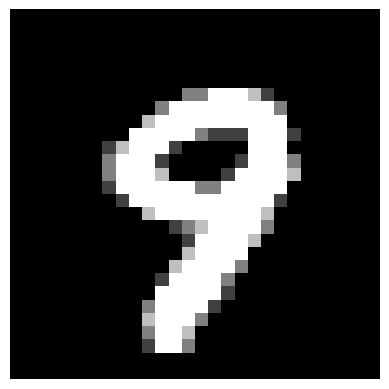

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(linewidth=200)


# Set index of image to be seen
img_index = 5999 # 6000 -1

# Plot image
plt.imshow(training_images[img_index], cmap='gray')
plt.axis(False)

print('Label:', training_labels[img_index])
print('Matrix:', training_images[img_index])

### **Preparación de los datos**

Notarás que todos los valores están entre 0 y 255. Si estamos entrenando una red neuronal, por varias razones es más fácil si transformamos los valores para tratar todos con valores entre 0 y 1. Este proceso se llama **estandarización**.

In [ ]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

Label: 9
Matrix: [[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         

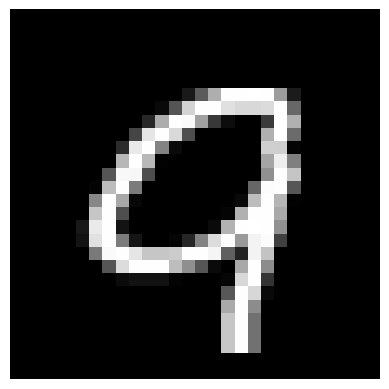

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(linewidth=200)


# Set index of image to be seen
img_index = 3000 # 6000 -1

# Plot image
plt.imshow(training_images[img_index], cmap='gray')
plt.axis(False)

print('Label:', training_labels[img_index])
print('Matrix:', training_images[img_index])

In [ ]:
training_images[0].shape

(28, 28)

### **Modelo**



In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))


> **Softmax Activation Function: Everything You Need to Know** - https://www.pinecone.io/learn/softmax-activation/


### **Optimizador y función de pérdida**

In [ ]:
# TODO: Create loss function and optimizer
loss = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.SGD(learning_rate=3e-3)

In [ ]:
# TODO: Integrate everything here!
model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=['accuracy']
)

### **Entrenamiento del modelo**

Para entrenar el modelo, simplemente utilizamos el método `.fit()` del modelo.

In [ ]:
history = model.fit(training_images, training_labels, epochs=6)

Epoch 1/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9023 - loss: 0.3492
Epoch 2/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9075 - loss: 0.3322
Epoch 3/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9112 - loss: 0.3176
Epoch 4/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9148 - loss: 0.3046
Epoch 5/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9193 - loss: 0.2910
Epoch 6/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9208 - loss: 0.2861



> **Pregunta clave:** ¿Qué sucede con la historia de entrenamiento?

In [ ]:
import plotly.express as px


seen = 'accuracy' # or 'loss'

hist_values = history.history[seen]
eje_x = np.arange(len(hist_values))

fig = px.line(
    x=eje_x,
    y=hist_values,
    title='Historia de entrenamiento',
    labels=dict(x='Épocas', y=seen.capitalize())
)
fig.show()

### Evaluación del modelo

In [ ]:
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9163 - loss: 0.3041


[0.26430782675743103, 0.9279000163078308]

### Predicción


Label: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Prediction: 4


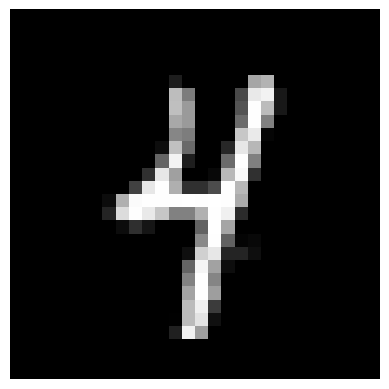

In [ ]:
import random

test_index = random.randint(0, 10000 - 1)

plt.imshow(test_images[test_index], cmap='gray')
plt.axis(False)

print('Label:', test_labels[test_index])
input_image = np.reshape(test_images[test_index], (1, 784))
prediction = model.predict(np.expand_dims(input_image, axis=-1))
print('Prediction:', np.argmax(prediction))

In [ ]:
prediction

array([[0.03409054, 0.00134217, 0.30266395, 0.05218992, 0.0060099 , 0.03940286, 0.02741494, 0.44213265, 0.01836056, 0.07639252]], dtype=float32)

> **Para resolver el reto es:** Mejorar el accuracy obtenido en la clase.

**Puedes explorar:**
- El número de capas.
- Las épocas de entrenamiento.
- Las funciones de activación.
- Investigar otras capas.

--------

> Contenido creado por **Rodolfo Ferro**, 2024. <br>
> Para cualquier retroalimentación, puedes contactarme a través del correo [ferro@cimat.mx](mailto:ferro@cimat.mx).